In [13]:
import pandas as pd
import matplotlib.pyplot as plots
import numpy as np
import scipy.stats as s
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
officer_df = pd.read_csv("/content/drive/MyDrive/Fair Policing in Chicago DS3 Project/data/officer-profiles.csv.gz")
officer_df.sort_values(by=['resignation_date'],ascending=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
33606,133607,RAPHAEL,O BRYANT,NaN,NaN,NaN,NaN,BLACK,MALE,2017-09-18,2017-09-17,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33617.0
16037,116038,JUAN,MENDOZA,A,NaN,JR,1954.0,ASIAN/PACIFIC ISLANDER,MALE,1999-07-12,2017-08-24,1.0,17526.0,2.0,POLICE OFFICER,1999-07-12,1999-07-12,9,POLICE OFFICER,18832.0
10282,110283,HAROLD,JENKINS,W,NaN,NaN,1954.0,BLACK,MALE,1999-07-12,2017-08-19,1.0,16408.0,5.0,POLICE OFFICER,1999-07-12,1999-07-12,6,POLICE OFFICER,13395.0
23327,123328,QUINTON,HANKS,T,NaN,NaN,1954.0,BLACK,MALE,1998-10-13,2017-08-19,1.0,18446.0,2.0,POLICE OFFICER,1998-10-13,1998-10-13,11,POLICE OFFICER,11311.0
2120,102121,BEN,TORRES,NaN,NaN,NaN,1965.0,HISPANIC,MALE,1997-07-07,2017-08-15,1.0,7262.0,19.0,POLICE OFFICER,1997-07-07,1989-11-08,7,POLICE OFFICER,28750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33688,133689,NaN,NaN,L,NaN,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33699.0
33689,133690,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0,NaN,NaN,NaN,1,NaN,33700.0
33690,133691,NaN,NaN,L,NaN,NaN,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,1,NaN,33701.0
33691,133692,NaN,NaN,P,NaN,NaN,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33702.0


In [4]:
# Data Cleaning - Removing unnecessary columns and null values
# size = 33,467 officers
# 13,274 officers with appointed_date and NaN resignation_date: means they are currently working

#cleaned_cols = officer_df.loc[:, ["UID", "first_name", "last_name", "middle_initial", "race", "gender", "appointed_date", "resignation_date", "cleaned_rank"]]
#officers_cleaned = cleaned_cols.loc[cleaned_cols.race.notnull() & cleaned_cols.appointed_date.notnull() & cleaned_cols.resignation_date.notnull() & cleaned_cols.last_name.notnull() & cleaned_cols.first_name.notnull()]
#officers_cleaned
cleaned_cols = officer_df.loc[:, ["UID", "first_name", "last_name", "middle_initial", "race", "gender", "appointed_date", "resignation_date"]]
officers_cleaned = cleaned_cols.loc[cleaned_cols.race.notnull() & cleaned_cols.appointed_date.notnull() & cleaned_cols.last_name.notnull() & cleaned_cols.first_name.notnull()]
print(officers_cleaned['resignation_date'].isnull().sum())
officers_cleaned['event'] = 1
officers_cleaned

13274


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,event
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,1
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,1
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,1
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,1
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,1
...,...,...,...,...,...,...,...,...,...
33660,133661,MATTHEW,SZMIGIELSKI,,WHITE,MALE,2016-06-16,NaN,1
33661,133662,DILLAN,HALLEY,J,WHITE,MALE,2013-12-16,NaN,1
33662,133663,JESUS,NAVARRO,NaN,HISPANIC,MALE,2017-05-16,NaN,1
33665,133666,SANDRA,RIVERA,,HISPANIC,FEMALE,2018-02-20,NaN,1


In [5]:
# df checking only Race and Gender are not null

profiles_df = officer_df.loc[(officer_df.race.notnull()) & (officer_df.gender.notnull())]
real_white_list = profiles_df[profiles_df.race == "WHITE"]
real_black_list = profiles_df.loc[profiles_df.race == "BLACK"].race.tolist()
real_hispanic_list = profiles_df.loc[profiles_df.race == "HISPANIC"].race.tolist()
real_other_list = profiles_df.loc[(profiles_df.race != "HISPANIC") & (profiles_df.race != "BLACK") & (profiles_df.race != "WHITE")].race.tolist()

real_male_list = profiles_df[profiles_df.gender == "MALE"]
real_female_list = profiles_df[profiles_df.gender == "FEMALE"]

profiles_df

,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2863.0
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,6100.0
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,14560.0
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,15445.0
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NaN,123.0,POLICE OFFICER,NaN,NaN,3,POLICE OFFICER,18373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33666,133667,ROBERT,OLSZANSKI,,NaN,NaN,NaN,WHITE,MALE,2017-05-16,NaN,NaN,10348.0,NaN,NaN,NaN,NaN,1,NaN,33677.0
33667,133668,DEBBIE,ROBERSON,L,NaN,NaN,1955.0,BLACK,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33678.0
33668,133669,JOHN,MACIEJEWSKI,A,NaN,NaN,1941.0,WHITE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33679.0
33669,133670,ROBIN,BELL,L,NaN,NaN,1965.0,BLACK,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33680.0


In [6]:
def years_as_officer(row):
    
    # Function that takes in a row as an input, and outputs the total time an officer has been working
    try:
        appointed_date = row['appointed_date']
        resigned_date = row['resignation_date']
        
        appointed_year = int(appointed_date[:4])
        appointed_month = int(appointed_date[5:7])
        appointed_day = int(appointed_date[8:10])
        
        resigned_year = int(resigned_date[:4])
        resigned_month = int(resigned_date[5:7])
        resigned_day = int(resigned_date[8:10])
        
        years = resigned_year - appointed_year
        months = years * 12
        
        days = 0
        if appointed_day == resigned_day:
            days = 1
        else:
            days = float(resigned_day + (31 - appointed_day)) / 31
        
        month_diff = resigned_month - appointed_month
        
        if month_diff >= 0 :
            months = months + month_diff - 1 + days
        else:
            years = years - 1
            months = years * 12
            months = (12 + months + month_diff)
            months = months - 1 + days
        return round((float(months) / 12), 2)
    except:
    #officers with NaN resignation_date
        row['event'] = 0

        appointed_date = row['appointed_date']

        appointed_year = int(appointed_date[:4])
        appointed_month = int(appointed_date[5:7])
        appointed_day = int(appointed_date[8:10])

        #the day this data was collected: August 15th, 2018
        data_collected_year = 2018
        data_collected_month = 8
        data_collected_day = 15

        years = data_collected_year - appointed_year
        months = years * 12
        
        days = 0
        if appointed_day == data_collected_day:
            days = 1
        else:
            days = float(data_collected_day + (31 - appointed_day)) / 31
        
        month_diff = data_collected_month - appointed_month
        
        if month_diff >= 0 :
            months = months + month_diff - 1 + days
        else:
            years = years - 1
            months = years * 12
            months = (12 + months + month_diff)
            months = months - 1 + days
        return round((float(months) / 12), 2)

In [7]:
officers_cleaned["years_served"] = officers_cleaned.apply(years_as_officer, axis = 1) 
# Applying function to df

officers_cleaned.loc[(officers_cleaned.resignation_date.isnull()), 'event'] = 0
print(sum(officers_cleaned['event']==0))
officers_cleaned.sort_values(by=['event'],ascending=False)


13274


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,event,years_served
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,1,29.77
18468,118469,LUCILLE,MOY-BARTOSIK,H,ASIAN/PACIFIC ISLANDER,FEMALE,1983-02-14,2015-07-15,1,32.42
19021,119022,MARIO,NADELA,C,ASIAN/PACIFIC ISLANDER,MALE,1994-10-03,2014-10-15,1,20.03
19020,119021,MARIO,MORALES,A,HISPANIC,MALE,1996-07-08,2002-02-15,1,5.60
19016,119017,MARIO,MAIDA,V,WHITE,MALE,1956-05-01,1983-06-16,1,27.12
...,...,...,...,...,...,...,...,...,...,...
5715,105716,DAVID,MARTINEZ,R,HISPANIC,MALE,2005-09-26,NaN,0,12.89
5714,105715,DAVID,MARTINEZ,M,HISPANIC,MALE,2014-08-25,NaN,0,3.97
5713,105714,DAVID,MARTIN,G,WHITE,MALE,2017-02-16,NaN,0,1.50
23446,123447,RALPH,MIONSKOWSKI,L,HISPANIC,MALE,1999-05-10,NaN,0,19.26


In [8]:
# 33,324 officers with positive years_served
new_officers_cleaned = officers_cleaned.loc[officers_cleaned.years_served > 0] 
# Officers who served more than 0 days
new_officers_cleaned = new_officers_cleaned.loc[new_officers_cleaned.years_served <= 47]
new_officers_cleaned

,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,event,years_served
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,1,29.77
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,1,23.13
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,1,12.27
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,1,27.01
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,1,20.24
...,...,...,...,...,...,...,...,...,...,...
33660,133661,MATTHEW,SZMIGIELSKI,,WHITE,MALE,2016-06-16,NaN,0,2.16
33661,133662,DILLAN,HALLEY,J,WHITE,MALE,2013-12-16,NaN,0,4.66
33662,133663,JESUS,NAVARRO,NaN,HISPANIC,MALE,2017-05-16,NaN,0,1.25
33665,133666,SANDRA,RIVERA,,HISPANIC,FEMALE,2018-02-20,NaN,0,0.49


In [9]:
# Separating officers from gender

female_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "FEMALE"]
male_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "MALE"]

female_list = female_officers.years_served.tolist()
male_list = male_officers.years_served.tolist()

female_series = pd.Series(female_list)
male_series = pd.Series(male_list)

Male Officer Statistics:
count    27643.000000
mean        21.912312
std         10.891357
min          0.010000
25%         13.810000
50%         24.280000
75%         30.400000
max         46.840000
dtype: float64


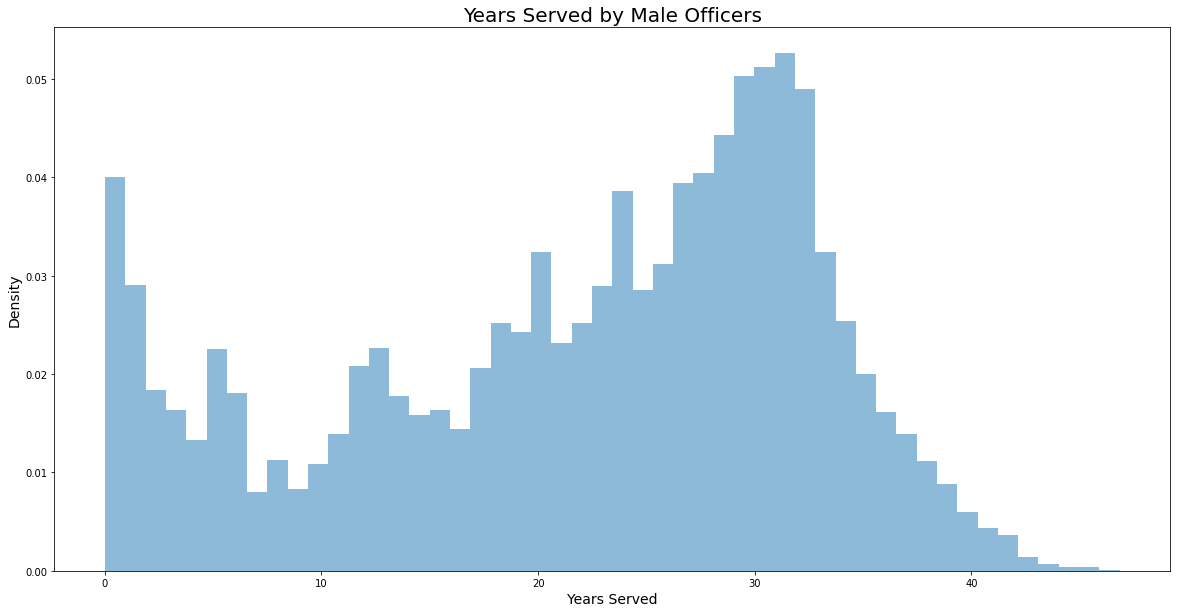

In [ ]:
# Histogram of Years Served by Male Officers

print('\033[1m' + "Male Officer Statistics:" + "\033[0;0m")
print(male_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Male")
plots.title("Years Served by Male Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Female Officer Statistics:
count    5681.000000
mean       16.207493
std         9.696621
min         0.010000
25%         7.360000
50%        18.160000
75%        23.870000
max        41.080000
dtype: float64


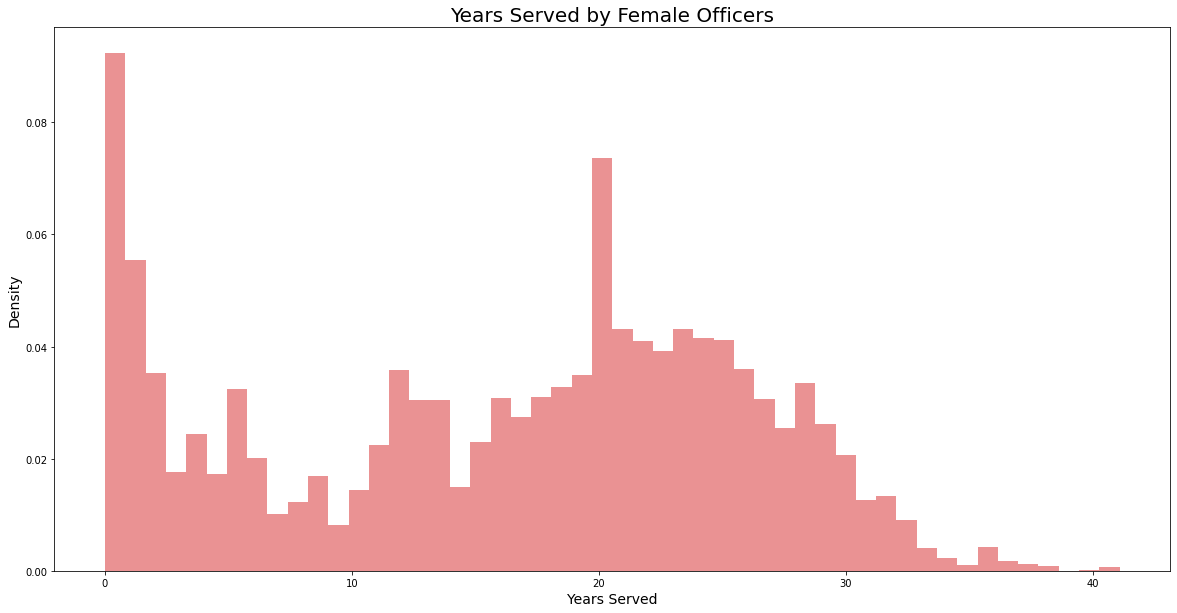

In [ ]:
# Histogram of Years Served by Female Officers

print('\033[1m' + "Female Officer Statistics:" + "\033[0;0m")
print(female_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(female_list, density = True, alpha = .5, color = 'tab:red', bins = 50, label = "Female")
plots.title("Years Served by Female Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

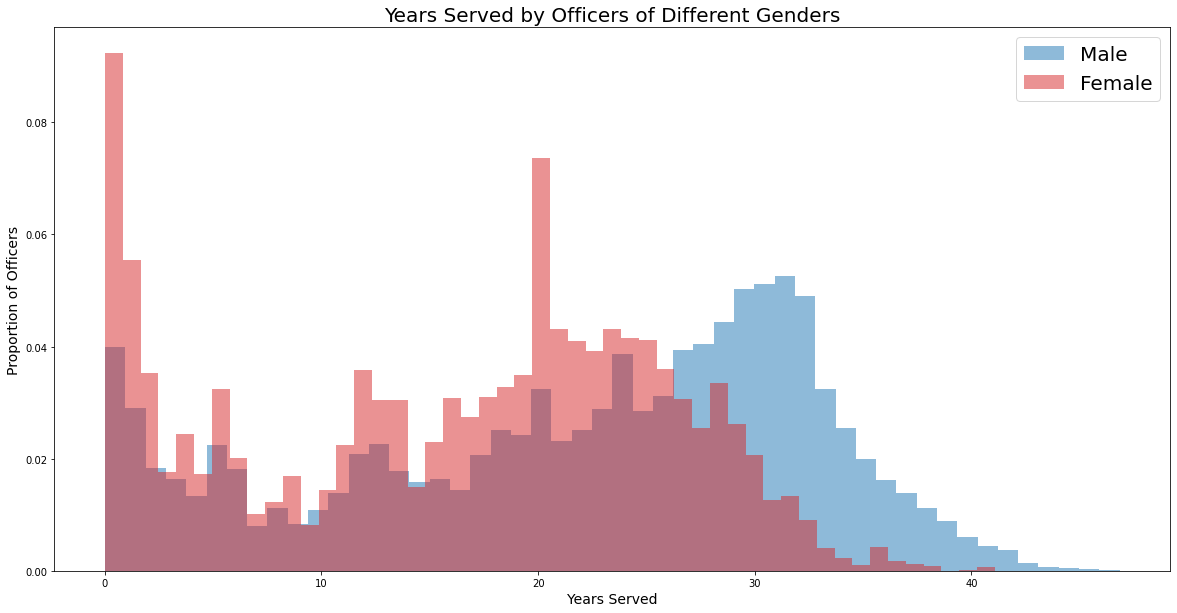

In [ ]:
# Overlayed Histogram of Years Served by Officers of Different Genders

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Male")
plots.hist(female_list, density = True, alpha = .5, color = 'tab:red', bins = 50, label = "Female")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Genders", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Proportion of Officers", size = 14)
plots.savefig('overlayed_gender.png', dpi=300, bbox_inches='tight')
plots.show()

#2-sample t-test?

In [10]:

# Separating officers from race

black_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "BLACK"]
white_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "WHITE"]
hispanic_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "HISPANIC"]
other_officers = new_officers_cleaned.loc[(new_officers_cleaned.race != "BLACK") & (new_officers_cleaned.race != "HISPANIC") & (new_officers_cleaned.race != "WHITE")]
not_white_black = new_officers_cleaned.loc[(new_officers_cleaned.race != "BLACK") & (new_officers_cleaned.race != "WHITE")]

black_list = black_officers.years_served.tolist()
white_list = white_officers.years_served.tolist()
hispanic_list = hispanic_officers.years_served.tolist()
other_list = other_officers.years_served.tolist()
n_wob = not_white_black.years_served.tolist()

black_series = pd.Series(black_list)
white_series = pd.Series(white_list)
hispanic_series = pd.Series(hispanic_list)
other_series = pd.Series(other_list)
nwob_series = pd.Series(n_wob)

Black Officer Statistics:
count    7600.000000
mean       20.305658
std        10.074684
min         0.010000
25%        13.200000
50%        22.280000
75%        28.160000
max        45.810000
dtype: float64


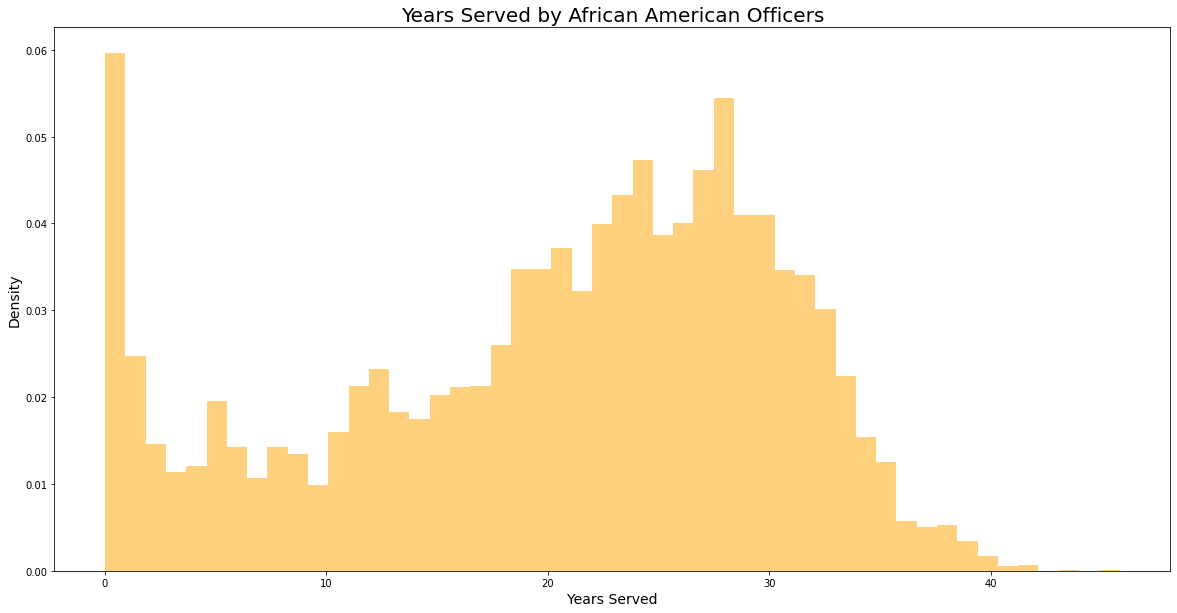

In [ ]:
# Histogram of years served by African American officers

print('\033[1m' + "Black Officer Statistics:" + "\033[0;0m")
print(black_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(black_list, density = True, alpha = .5, color = 'orange', bins = 50, label = "African American")
plots.title("Years Served by African American Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Hispanic Officer Statistics
count    4560.000000
mean       14.108715
std        10.132446
min         0.010000
25%         3.970000
50%        13.810000
75%        22.270000
max        41.490000
dtype: float64


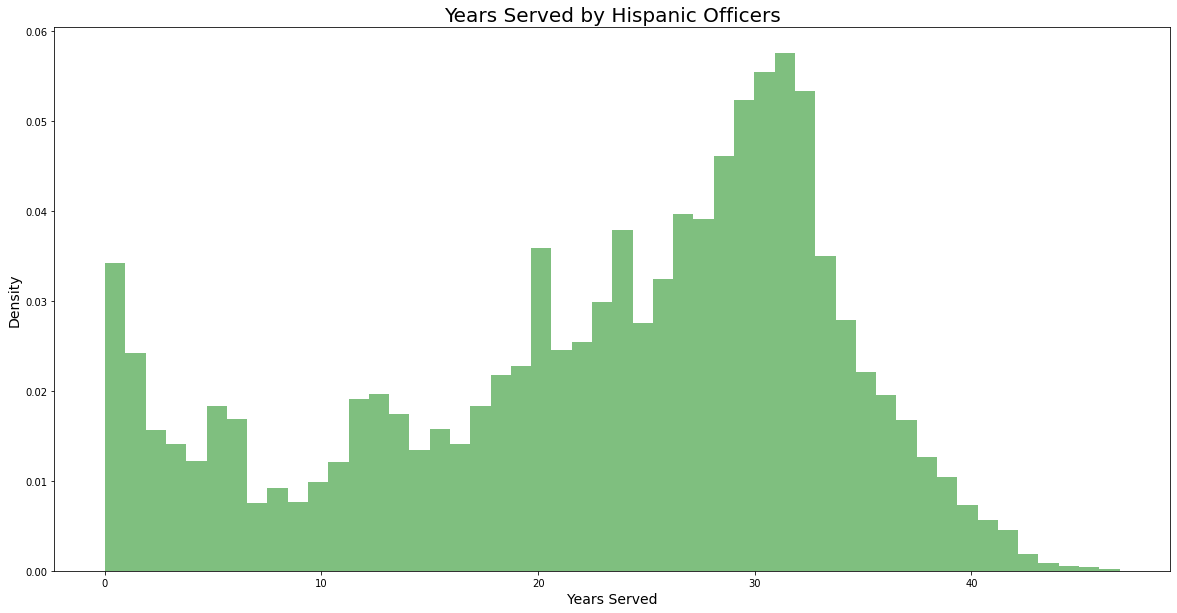

In [ ]:
# Histogram of years served by Hispanic officers

print('\033[1m' + "Hispanic Officer Statistics" + "\033[0;0m")
print(hispanic_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(white_list, density = True, alpha = .5, color = 'Green', bins = 50)
plots.title("Years Served by Hispanic Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

White Officer Statistics
count    20565.000000
mean        22.898453
std         10.690794
min          0.010000
25%         15.880000
50%         25.580000
75%         31.050000
max         46.840000
dtype: float64


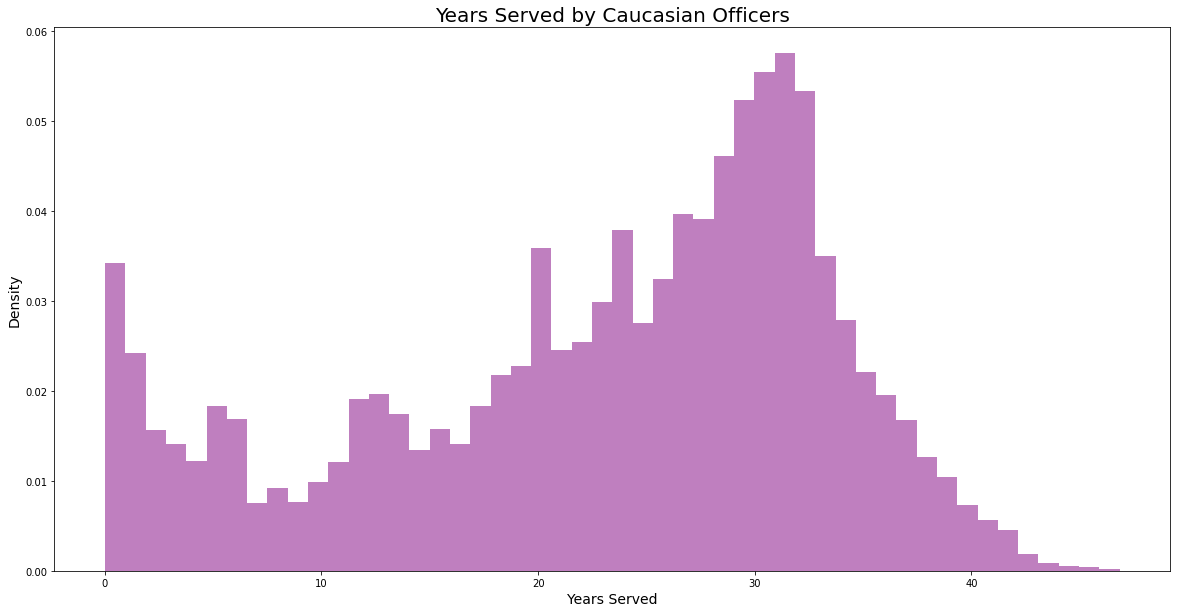

In [ ]:
# Histogram of years served by Caucasian officers

print('\033[1m' + "White Officer Statistics" + "\033[0;0m")
print(white_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(white_list, density = True, alpha = .5, color = 'purple', bins = 50)
plots.title("Years Served by Caucasian Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Other Officer Statistics
count    599.000000
mean      13.741886
std        9.228072
min        0.020000
25%        5.290000
50%       13.710000
75%       20.095000
max       41.760000
dtype: float64


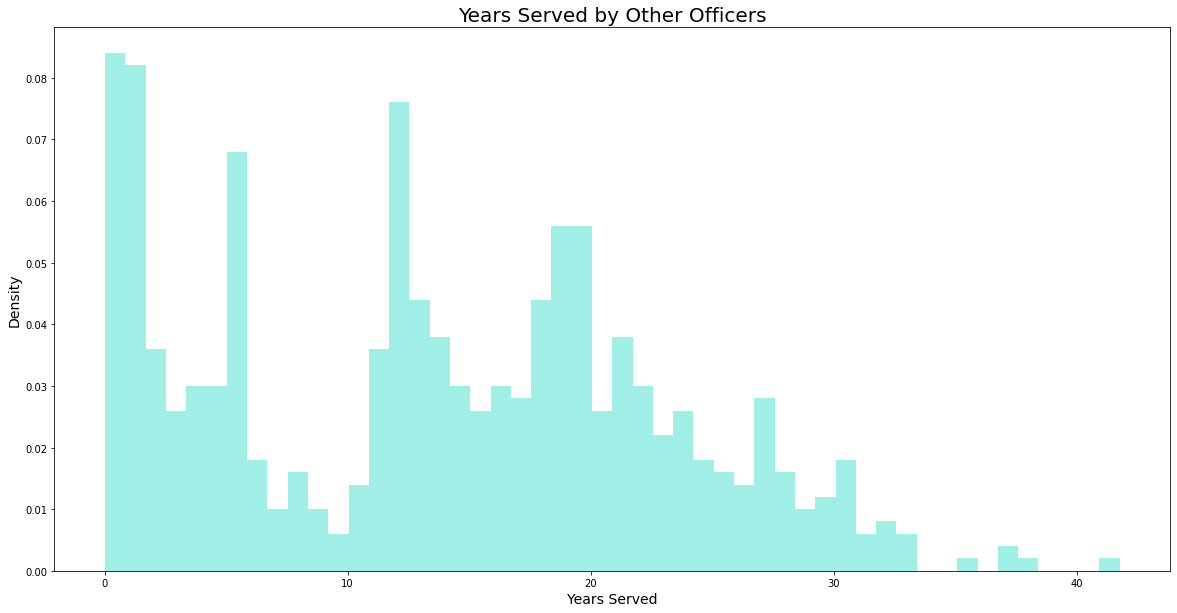

In [ ]:
# Histogram of years served by nonwhite, nonblack, and nonhispanic officers

print('\033[1m' + "Other Officer Statistics" + "\033[0;0m")
print(other_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(other_list, density = True, alpha = .5, color = 'turquoise', bins = 50, label = "Other")
plots.title("Years Served by Other Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Other Officer Statistics
count    5159.000000
mean       14.066123
std        10.031471
min         0.010000
25%         4.220000
50%        13.810000
75%        22.030000
max        41.760000
dtype: float64


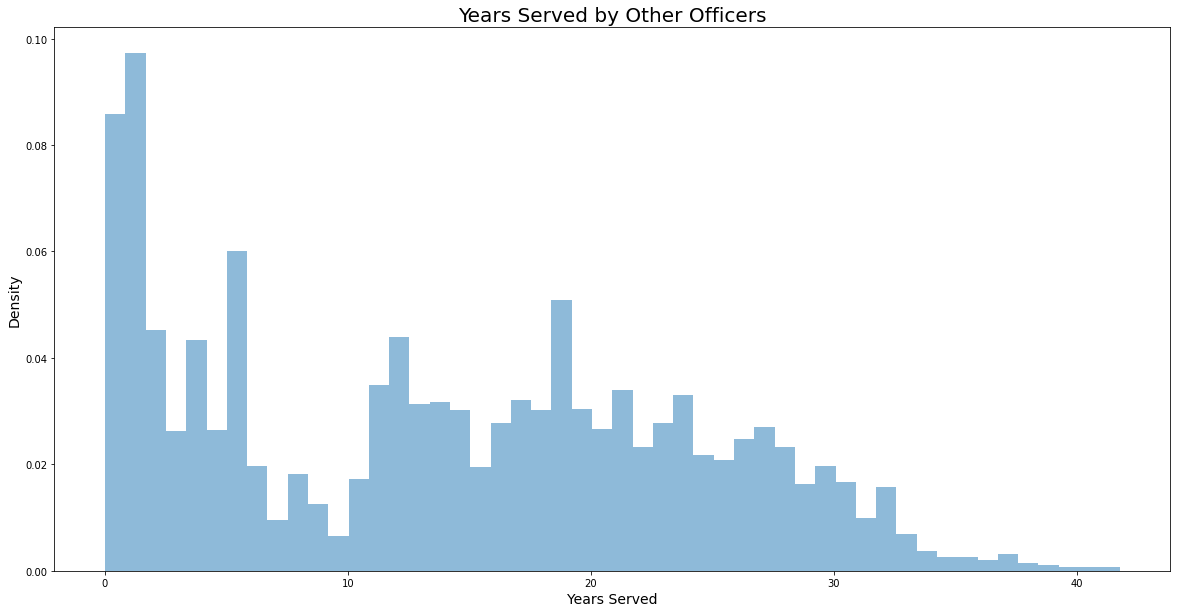

In [ ]:
# Histogram of years served by Hispanic, API, and other officers

print('\033[1m' + "Other Officer Statistics" + "\033[0;0m")
print(nwob_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(n_wob, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Other")
plots.title("Years Served by Other Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

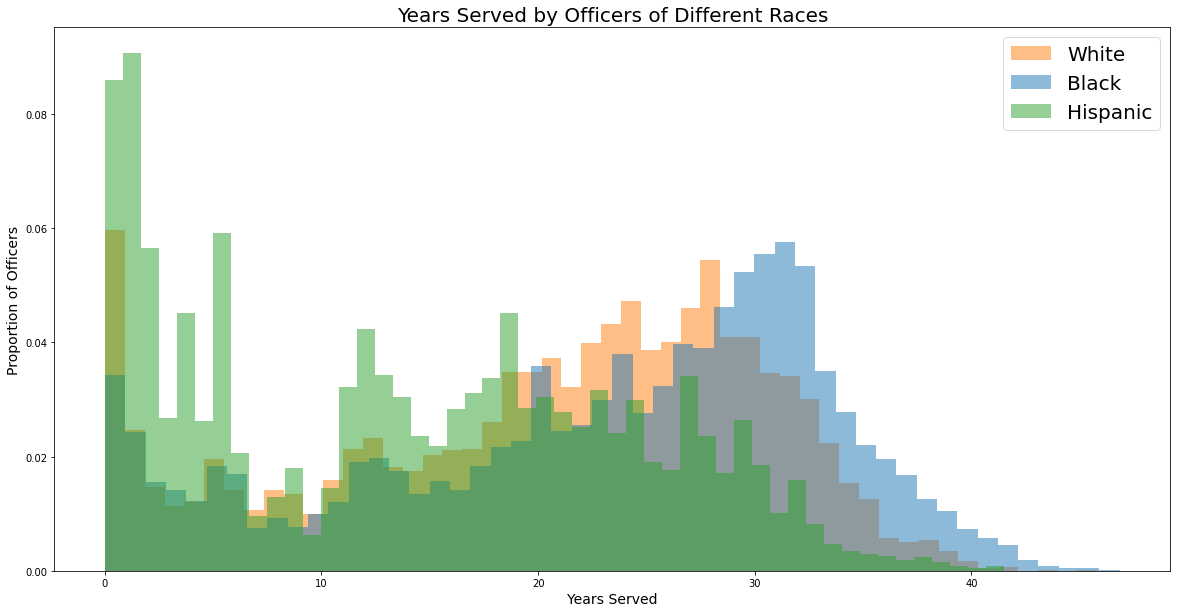

In [ ]:
# Overlayed histogram of years served by officers of different races

plots.figure(figsize=(20, 10))
plots.hist(black_list, density = True, alpha = .5, color = 'tab:orange', bins = 50, label = "White")
plots.hist(white_list, density = True, alpha = .5, color = 'tab:blue', bins = 50, label = "Black")
plots.hist(hispanic_list, density = True, alpha = .5, color = 'tab:green', bins = 50, label = "Hispanic")
#plots.hist(n_wob, density = True, alpha = .5, color = 'tab:green', bins = 50, label = "Hispanic/Other")
#plots.hist(other_list, density = True, alpha = .5, color = 'yellow', bins = 50, label = "Other")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Races", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Proportion of Officers", size = 14)
plots.savefig('overlayed.png', dpi=300, bbox_inches='tight')
plots.show()

In [ ]:
#start kaplan meier
km = new_officers_cleaned[["UID", "race", "gender", "years_served", 'event']]
km
km.to_csv(r'/content/drive/MyDrive/Fair Policing in Chicago DS3 Project/data/KaplanMeier.csv')
#used this csv for R analysis

In [ ]:
km.sort_values(by=['UID'])
km.reset_index(inplace=True)
km.head(10)

,index,UID,race,gender,years_served,event
0,0,100001,WHITE,MALE,29.77,1
1,1,100002,WHITE,MALE,23.13,1
2,2,100003,WHITE,MALE,12.27,1
3,3,100004,WHITE,MALE,27.01,1
4,4,100005,BLACK,MALE,20.24,1
5,5,100006,WHITE,MALE,32.39,1
6,6,100007,HISPANIC,MALE,8.66,0
7,7,100008,BLACK,MALE,2.13,0
8,8,100009,BLACK,MALE,12.69,0
9,9,100010,BLACK,MALE,5.20,0


In [ ]:
print(km['years_served'].mean())
print(km['years_served'].median())
print(sum(km['gender']=="FEMALE"))
print(sum(km['gender']=="MALE"))
print(km.loc[km['gender']=='FEMALE']['years_served'].mean())
print(km.loc[km['gender']=='MALE']['years_served'].mean())

20.9397674348817
23.07
5681
27643
16.207493399049643
21.912311977715813


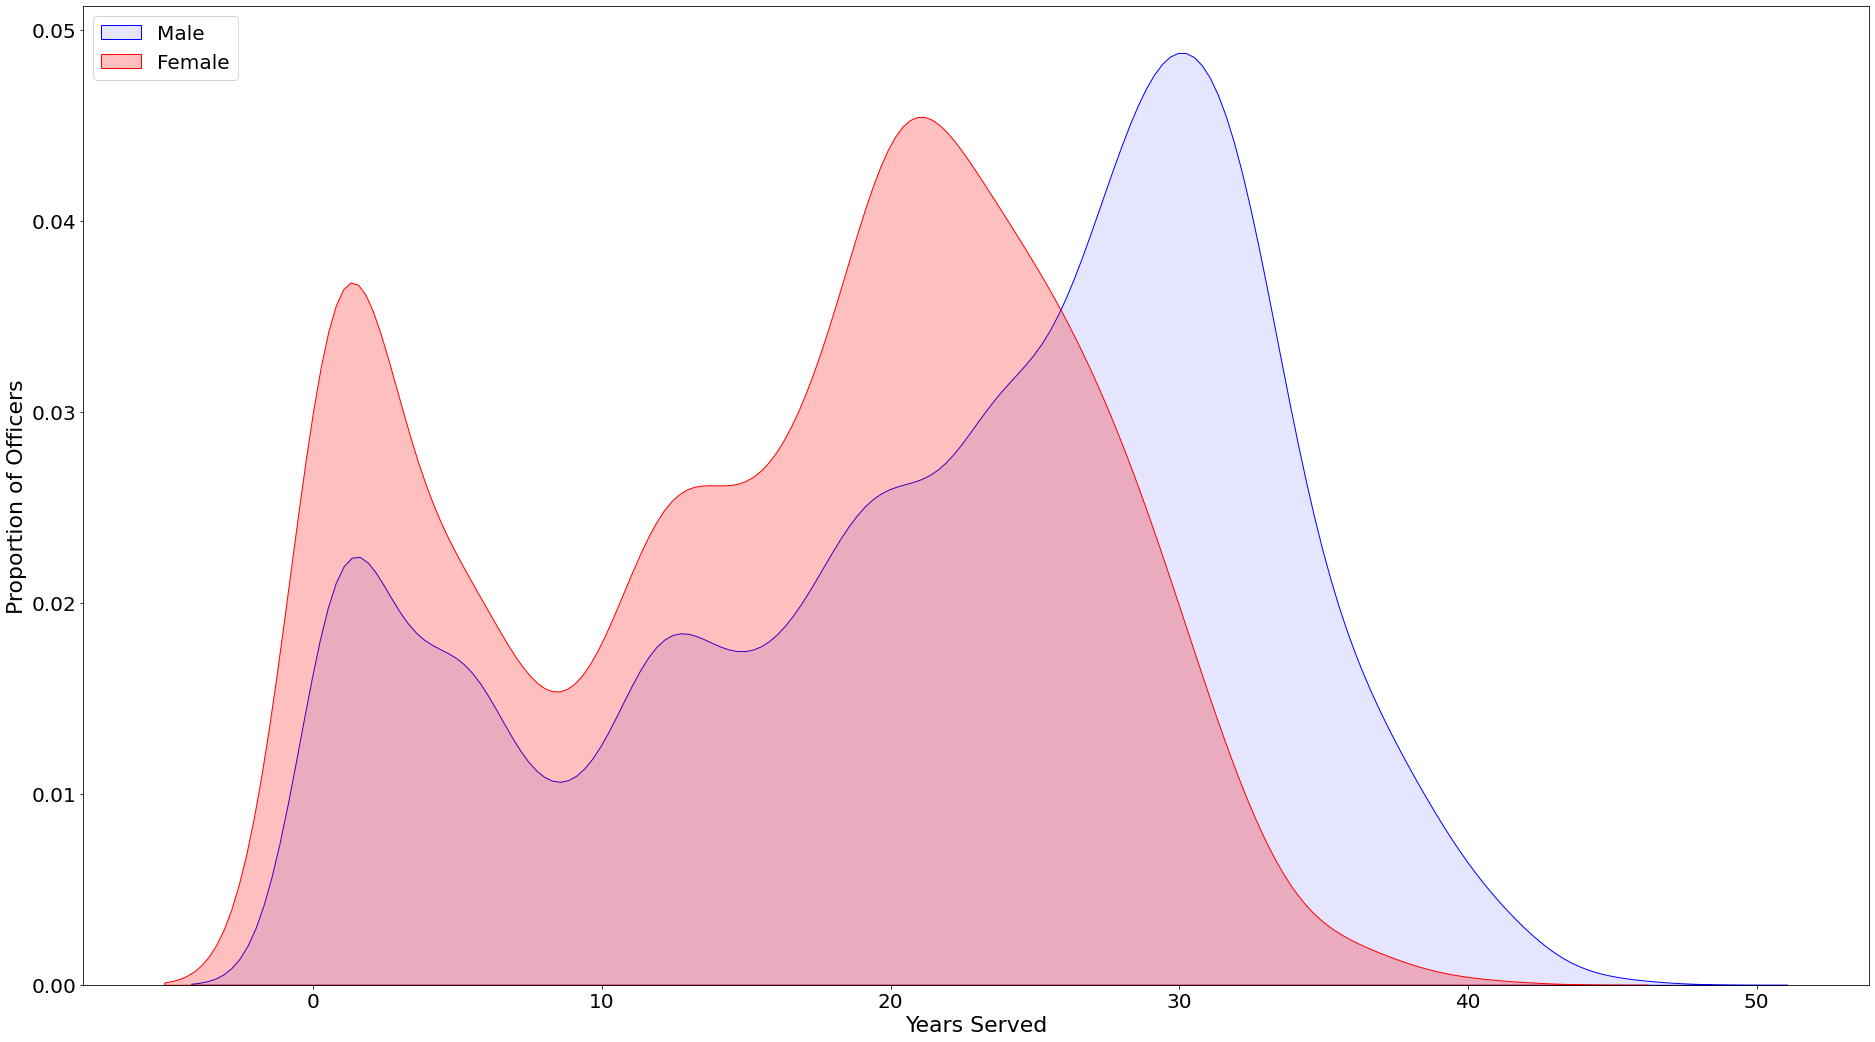

In [20]:
fig, ax = plots.subplots(figsize=(32,18))
# number of colors should be the number of histograms you'll have
colors = ['r','blue']
idx = 0
#for x in ['MALE', 'FEMALE']:
ax = sns.kdeplot(male_list, color=colors[1], label='Male', shade=True, alpha=0.1, legend = True)
ax = sns.kdeplot(female_list, color=colors[0], label='Female', shade = True, legend = True)
#idx += 1
ax.legend(fontsize=20, loc='upper left',)
#ax.set_title("~~~", fontsize=24)
ax.set_ylabel("Proportion of Officers", fontsize=22)
ax.set_xlabel("Years Served", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)

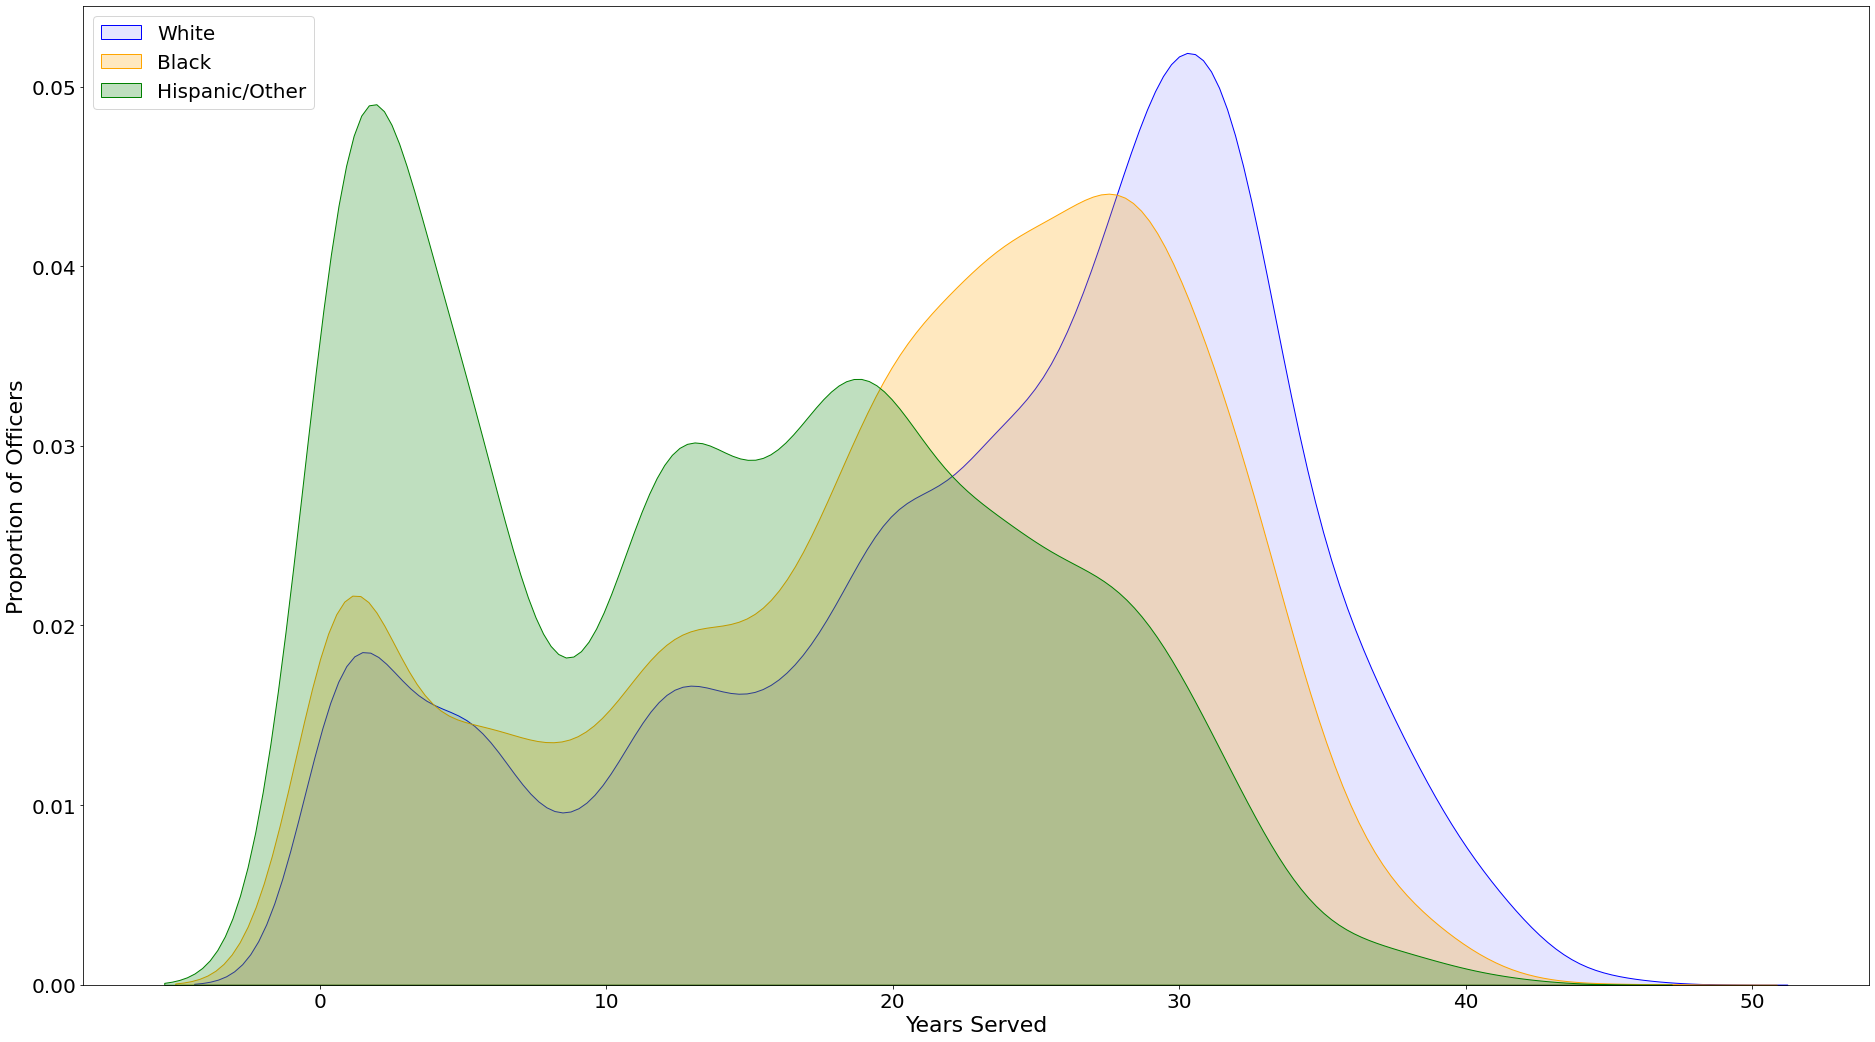

In [23]:
fig, ax = plots.subplots(figsize=(32,18))
# number of colors should be the number of histograms you'll have
colors = ['blue','orange', 'g']
idx = 0
#for x in ['MALE', 'FEMALE']:
ax = sns.kdeplot(white_list, color=colors[0], label='White', shade=True, alpha=0.1, legend = True)
ax = sns.kdeplot(black_list, color=colors[1], label='Black', shade = True, legend = True)
ax = sns.kdeplot(n_wob, color=colors[2], label='Hispanic/Other', shade = True, legend = True)
#ax = sns.kdeplot(other_list, color=colors[3], label='Other', shade = True, legend = True)
#idx += 1
ax.legend(fontsize=20, loc='upper left',)
#ax.set_title("~~~", fontsize=24)
ax.set_ylabel("Proportion of Officers", fontsize=22)
ax.set_xlabel("Years Served", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)